Mounting the Drive onto the google colab to open data

In [1]:
#from google.colab import drive
#drive.mount('/content/CV_project')
!ls
!pwd
!cd KITTI_dataset
!ls

KITTI_dataset  seq02.png  sift_features.png  sift_ouutput.png  SVO.ipynb
/home/ghokulji/Desktop/WPI/Academics/Computer_Vision/CV_project
KITTI_dataset  seq02.png  sift_features.png  sift_ouutput.png  SVO.ipynb


Include the header file


In [2]:
import cv2
import matplotlib.pyplot as plt
import os
import datetime
import pandas as pd
import numpy as np
import sys

In [3]:
#from google.colab.patches import cv2_imshow

In [4]:
class Dataset_Handler():
    def __init__(self, low_memory=True):
        
        # This will tell odometry functin how to access data from this object
        self.low_memory = low_memory
        
        # Set file paths and get ground truth poses
        self.seq_dir = '/home/ghokulji/Desktop/WPI/Academics/Computer_Vision/CV_project/KITTI_dataset/dataset/sequences/04/'
        self.poses_dir = '/home/ghokulji/Desktop/WPI/Academics/Computer_Vision/CV_project/KITTI_dataset/dataset/poses/04.txt'
        poses = pd.read_csv(self.poses_dir, delimiter=' ', header=None)
        
        # Get names of files to iterate through
        self.left_image_files = sorted(os.listdir(self.seq_dir + 'image_0'))
        print(self.left_image_files)
        self.right_image_files = sorted(os.listdir(self.seq_dir + 'image_1'))
        self.num_frames = len(self.left_image_files)
               
        # Get calibration details for scene
        # P0 and P1 are Grayscale cams, P2 and P3 are RGB cams
        calib = pd.read_csv('/home/ghokulji/Desktop/WPI/Academics/Computer_Vision/CV_project/KITTI_dataset/dataset/sequences/04/calib.txt', delimiter=' ', header=None, index_col=0)
        self.P0 = np.array(calib.loc['P0:']).reshape((3,4))
        self.P1 = np.array(calib.loc['P1:']).reshape((3,4))
        self.P2 = np.array(calib.loc['P2:']).reshape((3,4))
        self.P3 = np.array(calib.loc['P3:']).reshape((3,4))
        
        # Get times and ground truth poses
        self.times = np.array(pd.read_csv('/home/ghokulji/Desktop/WPI/Academics/Computer_Vision/CV_project/KITTI_dataset/dataset/sequences/04/times.txt', 
                                          delimiter=' ', 
                                          header=None))
        self.gt = np.zeros((len(poses), 3, 4))
        for i in range(len(poses)):
            self.gt[i] = np.array(poses.iloc[i]).reshape((3, 4))
        
        # Get images and lidar loaded
        if self.low_memory:
            # Will use generators to provide data sequentially to save RAM
            # Use class method to set up generators
            self.reset_frames()
            # Store original frame to memory for testing functions
            self.first_image_left = cv2.imread(self.seq_dir + 'image_0/' 
                                               + self.left_image_files[0], 0)
            self.first_image_right = cv2.imread(self.seq_dir + 'image_1/' 
                                               + self.right_image_files[0], 0)
            self.second_image_left = cv2.imread(self.seq_dir + 'image_0/' 
                                               + self.left_image_files[1], 0)

            self.imheight = self.first_image_left.shape[0]
            self.imwidth = self.first_image_left.shape[1]
            
        else:
            # If RAM is not a concern (>32GB), pass low_memory=False
            self.images_left = []
            self.images_right = []
            self.pointclouds = []
            for i, name_left in enumerate(self.left_image_files):
                name_right = self.right_image_files[i]
                self.images_left.append(cv2.imread(self.seq_dir + 'image_0/' + name_left))
                self.images_right.append(cv2.imread(self.seq_dir + 'image_1/' + name_right))
                
            self.imheight = self.images_left[0].shape[0]
            self.imwidth = self.images_left[0].shape[1]
            # Keep consistent instance variable names as when using low_memory
            self.first_image_left = self.images_left[0]
            self.first_image_right = self.images_right[0]
            self.second_image_left = self.images_left[1]
            
    def reset_frames(self):
        # Resets all generators to the first frame of the sequence
        self.images_left = (cv2.imread(self.seq_dir + 'image_0/' + name_left, 0)
                            for name_left in self.left_image_files)
        self.images_right = (cv2.imread(self.seq_dir + 'image_1/' + name_right, 0)
                            for name_right in self.right_image_files)
        pass

In [5]:
handler = Dataset_Handler()

['000000.png', '000001.png', '000002.png', '000003.png', '000004.png', '000005.png', '000006.png', '000007.png', '000008.png', '000009.png', '000010.png', '000011.png', '000012.png', '000013.png', '000014.png', '000015.png', '000016.png', '000017.png', '000018.png', '000019.png', '000020.png', '000021.png', '000022.png', '000023.png', '000024.png', '000025.png', '000026.png', '000027.png', '000028.png', '000029.png', '000030.png', '000031.png', '000032.png', '000033.png', '000034.png', '000035.png', '000036.png', '000037.png', '000038.png', '000039.png', '000040.png', '000041.png', '000042.png', '000043.png', '000044.png', '000045.png', '000046.png', '000047.png', '000048.png', '000049.png', '000050.png', '000051.png', '000052.png', '000053.png', '000054.png', '000055.png', '000056.png', '000057.png', '000058.png', '000059.png', '000060.png', '000061.png', '000062.png', '000063.png', '000064.png', '000065.png', '000066.png', '000067.png', '000068.png', '000069.png', '000070.png', '0000

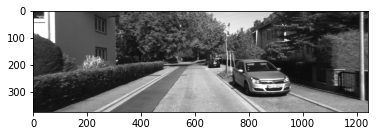

In [6]:
img = cv2.imread('/home/ghokulji/Desktop/WPI/Academics/Computer_Vision/CV_project/KITTI_dataset/dataset/sequences/03/image_0/000000.png')
#cv2.imshow('Image',img)
plt.imshow(img)

[[149 148 145 ...  16  13  13]
 [144 144 147 ...  16  14  13]
 [146 143 146 ...  14  13  15]
 ...
 [ 93  88  83 ... 110 108 104]
 [ 80  81  83 ... 101 104 106]
 [ 78  81  85 ...  91  90  93]]


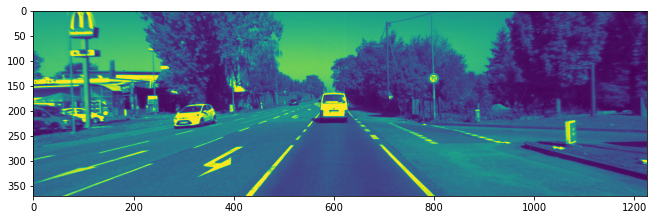

In [7]:
plt.figure(figsize=(11,7))
print(handler.first_image_left)
plt.imshow(handler.first_image_left);

In [8]:
#deleted rgb function argument since our inputs are grayscale image
#Also deleted StereoSGBM_create() function assuming that we will only use StereoBM_create.
#Main functions used .StereoBM_create() and .compute()
def compute_left_disparity_map(img_left, img_right,matcher='bm'):
    
    sad_window = 6
    num_disparities = sad_window * 16
    block_size = 11
    
    if matcher =='bm':
      matcher = cv2.StereoBM_create(numDisparities=num_disparities,blockSize=block_size)
    
    elif matcher == 'sgbm':
        matcher = cv2.StereoSGBM_create(numDisparities=num_disparities,
                                        minDisparity=0,
                                        blockSize=block_size,
                                        P1 = 8 * 1 * block_size ** 2,
                                        P2 = 32 * 1 * block_size ** 2,
                                        mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY)

     
    #Here we use the .compute() function to calculate the disparity. start and 
    #end variables are used to calculate the time it takes to calculate the disparity    
    start = datetime.datetime.now()
    disp_left = matcher.compute(img_left, img_right).astype(np.float32)/16
    end = datetime.datetime.now()

    return disp_left

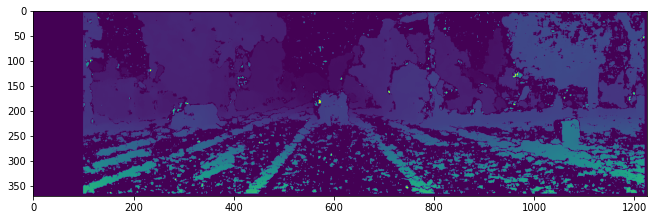

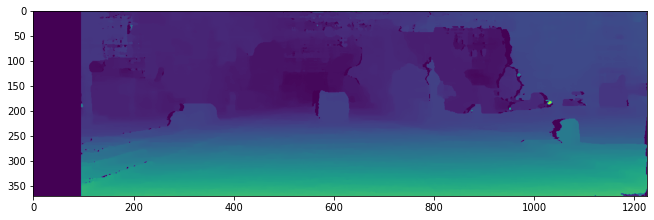

In [9]:
disp_BM = compute_left_disparity_map(handler.first_image_left,
                                  handler.first_image_right,matcher='bm')
disp_SGBM = compute_left_disparity_map(handler.first_image_left,
                                  handler.first_image_right,matcher='sgbm')
plt.figure(figsize=(11,7))
plt.imshow(disp_BM);
plt.figure(figsize=(11,7))
plt.imshow(disp_SGBM);

In [10]:
def decompose_projection_matrix(p):
    # decompose the projection matrix into intronsic and extrinsic matrix.
    # Extrinsic matrix is further decomposed into rotation and translation
    k, r, t, _, _, _, _ = cv2.decomposeProjectionMatrix(p)
    t = (t / t[3])[:3]
    
    return k, r, t

In [11]:
k_left,r_left,t_left=decompose_projection_matrix(handler.P0)

In [12]:
k_right,r_right,t_right=decompose_projection_matrix(handler.P1)

In [13]:
def calc_depth_map(disp_left, k_left, t_left, t_right, rectified=True):
    
    if rectified:
        b = t_right[0] - t_left[0]
    else:
        b = t_left[0] - t_right[0]
        
    f = k_left[0][0]
    
    disp_left[disp_left == 0.0] = 0.1
    disp_left[disp_left == -1.0] = 0.1
    
    depth_map = np.ones(disp_left.shape)
    depth_map = f * b / disp_left
    
    return depth_map

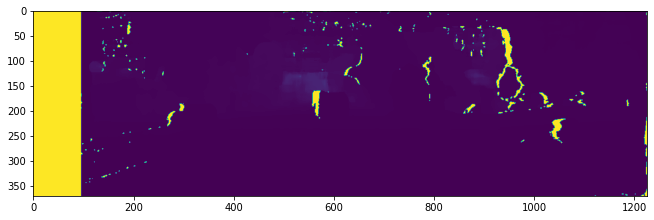

In [14]:
depth=calc_depth_map(disp_SGBM,k_left,t_left,t_right)
plt.figure(figsize=(11,7))
plt.imshow(depth)

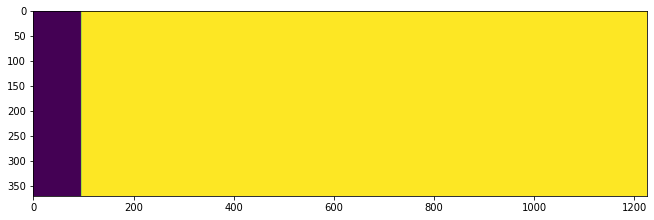

In [15]:
# Defining a mask to crop out the usable part of the depth map
mask=np.zeros(depth.shape,dtype=np.uint8)  # Defining a numpy array of zeros
  # ymax is the number of rows in the image
  # xmax is the number of columns in the image
cv2.rectangle(mask, (96, 0), (depth.shape[1], depth.shape[0]), (255), thickness=-1)
plt.figure(figsize=(11,7))
plt.imshow(mask);

In [16]:
def stereo_2_depth(img_left, img_right, P0, P1, matcher='bm', verbose=False,
                   rectified=True):
    # Compute disparity map
    disp = compute_left_disparity_map(img_left,img_right, matcher)
    # Decompose projection matrices
    k_left, r_left, t_left = decompose_projection_matrix(P0)
    k_right, r_right, t_right = decompose_projection_matrix(P1)
    
    # Calculate depth map for left camera
    depth = calc_depth_map(disp, k_left, t_left, t_right)
    
    return depth

In [17]:
!pip install opencv-contrib-python

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [18]:
def extract_features(image,type="brief",mask=None):
  if type == "sift":  # EXECUTION PENDING
    features = cv2.SIFT_create()
  elif type == "orb":
    features = cv2.ORB_create();
  elif type == "surf":  # EXECUTION PENDING
    features = cv2.SIFT_create();
  elif type == "brief":
    # brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
    # kp, des = brief.compute(img, kp)
    # Initiate FAST detector
    star = cv2.xfeatures2d.StarDetector_create()
    # Initiate BRIEF extractor
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
    # find the keypoints with STAR
    kp = star.detect(image,None)
    # compute the descriptors with BRIEF
    kp, des = brief.compute(image, kp)
    return kp, des

    # This function offers a choice of determining keypoints and corresponding descriptors in an image.

  # kp denotes keypoints and des denotes the descriptors
  # keypoints are the points of interest in the image
  # descriptor holds the information about the keypoint
  # more the information stored in a specific keypoint, more valuable it is.
  # together the keypoint and descriptor define a feature. 
  kp, des = features.detectAndCompute(image,mask) 
  return kp, des


Features detected using orb are : 500
Time to match and filter:  0:00:00.561123
Features detected using BRIEF are : 452
Time to match and filter:  0:00:00.157593
Features detected using SIFT are : 2334
Time to match and filter:  0:00:00.187099


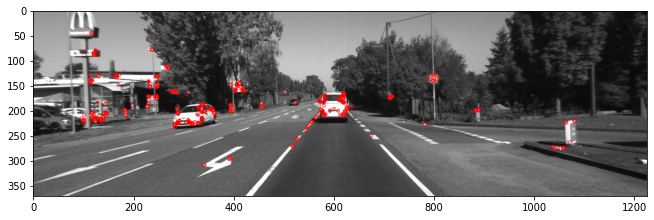

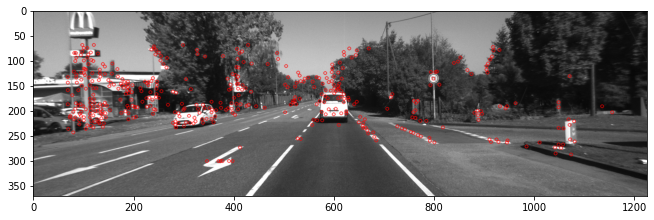

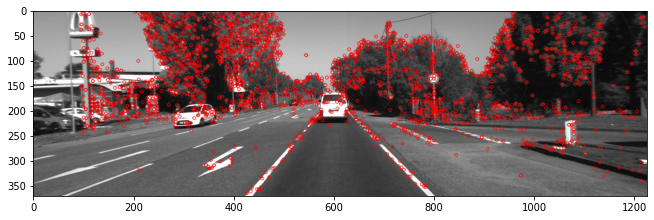

In [19]:
 start = datetime.datetime.now()
 kp, des = extract_features(handler.first_image_left,'orb',mask)
 image1 = cv2.drawKeypoints(handler.first_image_left,kp,None,color=(255,0,0),flags =0)
 print('Features detected using orb are :', len(kp))
 plt.figure(figsize=(11,7))
 plt.imshow(image1)
 end = datetime.datetime.now()
 print('Time to match and filter: ', end-start)

 start = datetime.datetime.now()
 kp, des = extract_features(handler.first_image_left,'brief',mask)
 print('Features detected using BRIEF are :', len(kp))
 image2 = cv2.drawKeypoints(handler.first_image_left,kp,None,color=(255,0,0),flags =0)
 plt.figure(figsize=(11,7))
 plt.imshow(image2)
 end = datetime.datetime.now()
 print('Time to match and filter: ', end-start)

 start = datetime.datetime.now()
 kp, des = extract_features(handler.first_image_left,'sift',mask)
 print('Features detected using SIFT are :', len(kp))
 image3 = cv2.drawKeypoints(handler.first_image_left,kp,None,color=(255,0,0),flags =0)
 plt.figure(figsize=(11,7))
 plt.imshow(image3)
 end = datetime.datetime.now()
 print('Time to match and filter: ', end-start)

In [20]:
def feature_matching(des1, des2, matching='BF',detector='orb', sort=False, k=2):
# https://docs.opencv.org/2.4/modules/features2d/doc/common_interfaces_of_descriptor_matchers.html#bfmatcher-bfmatcher
# k=2 is used by the KNN algorithm to find the 2 best possible matches of des1 and des2 
  if matching=='BF':
    if detector=='brief':
      matcher=cv2.BFMatcher_create(cv2.NORM_HAMMING,crossCheck=False)
    elif detector=='sift':
      matcher=cv2.BFMatcher_create(cv2.NORM_L1,crossCheck=False)
    elif detector=='orb':
      matcher=cv2.BFMatcher_create(cv2.NORM_HAMMING,crossCheck=False)

  elif matching=='FLANN':
      FLANN_INDEX_KDTREE = 1
      index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
      search_params = dict(checks=50)
      matcher = cv2.FlannBasedMatcher(index_params, search_params)
  
  print('matchers:',matcher)
  matches=matcher.knnMatch(des1,des2,k)

  if sort:
      matches=sorted(matches,key=lambda x:x[0].distance)

  return matches

# https://www.py4u.net/discuss/74476
# https://docs.opencv.org/2.4/modules/features2d/doc/common_interfaces_of_descriptor_matchers.html#bfmatcher-bfmatcher
# https://docs.opencv.org/3.4/db/d39/classcv_1_1DescriptorMatcher.html#a378f35c9b1a5dfa4022839a45cdf0e89


In [21]:
def visualize_matches(image1,kp1,image2,kp2,matches):   
  image_matches=cv2.drawMatches(image1,kp1,image2,kp2,matches, None, flags=2)
  plt.figure(figsize=(11,7),dpi=100)
  plt.imshow(image_matches)

In [22]:
def filter_matches_distance(matches,distance_thresh=0.5):
  filtered_matches=[]
  # Since we have defined k=2 for the KNN Matching algorithm, we have 2 best matches for every feature in the left image.
  # Here we will be keeping only the best match provided the distance between the two obtained is close. 
  # This makes sense because feature matching resulting in the best matches that are very far off from each other is likely to be an erronous match. 

  for m,n in matches:
    if m.distance<=distance_thresh * n.distance:
      filtered_matches.append(m)
      
  return filtered_matches

matchers: <BFMatcher 0x7f8a04f4e9f0>
Number of matches before filtering:  2334
Number of matches after filtering:  173
Time to match and filter:  0:00:00.459447


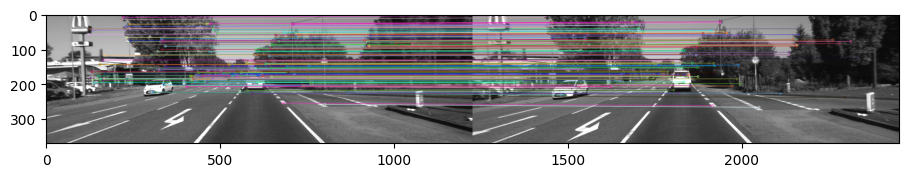

In [23]:
image_left = handler.first_image_left
image_right = handler.first_image_right
image_plus1 = handler.second_image_left
start = datetime.datetime.now()
kp0, des0 = extract_features(image_left, 'sift', mask)
kp1, des1 = extract_features(image_plus1, 'sift', mask)
matches = feature_matching(des0, des1, matching='BF', detector='sift', sort=False)
print('Number of matches before filtering: ', len(matches))
matches = filter_matches_distance(matches, 0.2)
print('Number of matches after filtering: ', len(matches))
end = datetime.datetime.now()
print('Time to match and filter: ', end-start)
visualize_matches(image_left, kp0, image_plus1, kp1, matches)

In [24]:
def estimate_motion(kp1, kp2, matches, k, depth1, max_depth=3000):
  
  rotationMatrix=np.eye(3)
  TranslationMatrix=np.zeros((3,1))

  image1_points = np.float32([kp1[m.queryIdx].pt for m in matches])
  image2_points = np.float32([kp2[m.trainIdx].pt for m in matches])
    
  cx=k[0, 2]
  cy=k[1, 2]
  fx=k[0, 0]
  fy=k[1, 1]
  
  object_points=np.zeros((0,3))
  delete=[]

  for i, (u, v) in enumerate(image1_points):
        
        z = depth1[int(round(v)), int(round(u))]
        if z > max_depth:
            delete.append(i)
            continue
        
        x = z * (u - cx) / fx
        y = z * (v - cy) / fy
        object_points = np.vstack([object_points, np.array([x, y, z])])

  image1_points = np.delete(image1_points, delete, 0)
  image2_points = np.delete(image2_points, delete, 0)
    
  _, rvec, tvec, inliers = cv2.solvePnPRansac(object_points, image2_points, k, None)
  rmat = cv2.Rodrigues(rvec)[0]
    
  return rmat, tvec, image1_points, image2_points

In [25]:
def visual_odometry(handler, detector='orb', matching='BF', filter_match_distance=None, stereo_matcher='sgbm', mask=None, subset=None, plot=False):
  
  num_frames = handler.num_frames
  #print('Number of frames', num_frames)

  Transformation_Mat=np.eye((4))
  trajectory=np.zeros((num_frames,3,4))
  trajectory[0]=Transformation_Mat[:3,:]

  k_left, r_left, t_left = decompose_projection_matrix(handler.P0)
  #print('K_left', k_left)

  if handler.low_memory:
    handler.reset_frames()
    image_plus1 = next(handler.images_left)

  for i in range(num_frames - 1):   
        if handler.low_memory:
            image_left = image_plus1
            image_plus1 = next(handler.images_left)
            image_right = next(handler.images_right)
        else:
            image_left = handler.images_left[i]
            image_plus1 = handler.images_left[i+1]
            image_right = handler.images_right[i]
            
        depth = stereo_2_depth(image_left,image_right,P0=handler.P0,P1=handler.P1, matcher='sgbm')
        #print('Depth', depth)

        kp0, des0 = extract_features(image_left, detector, mask)
        #print('kp0, des0', len(kp0), len(des0))
        kp1, des1 = extract_features(image_plus1, detector, mask)
        #print('kp1, des1', len(kp1), len(des1))

        unfiltered_matches = feature_matching(des0, des1, matching=matching, detector=detector)
        #print('unfiltered', len(unfiltered_matches))

        if filter_match_distance is not None:
          matches = filter_matches_distance(unfiltered_matches, filter_match_distance)
        else:
          matches = unfiltered_matches

        print('matches',len(matches))
        rot_mat, trans_vec, img1_points, img2_points = estimate_motion(kp0, kp1, matches, k_left, depth)

        trans_mat = np.eye(4)
        trans_mat[:3, :3] = rot_mat
        trans_mat[:3, 3] = trans_vec.T

        Transformation_Mat = Transformation_Mat.dot(np.linalg.inv(trans_mat))

        trajectory[i+1, :, :] = Transformation_Mat[:3, :]

        if plot:
          xs = trajectory[:i+2, 0, 3]
          ys = trajectory[:i+2, 1, 3]
          zs = trajectory[:i+2, 2, 3]
          plt.plot(xs, ys, zs, c='chartreuse')
          plt.pause(1e-32)

  if plot:
    plt.close()

  return trajectory  


In [26]:
plt.close()

In [27]:
trajectory_test = visual_odometry(handler, detector='sift', matching='BF', filter_match_distance=0.2, stereo_matcher='bm', mask=mask, subset=None, plot=False)

matchers: <BFMatcher 0x7f8a0487d4b0>
matches 173
matchers: <BFMatcher 0x7f8a047766f0>
matches 201
matchers: <BFMatcher 0x7f8a0487d4b0>
matches 188
matchers: <BFMatcher 0x7f8a04778fb0>
matches 194
matchers: <BFMatcher 0x7f8a0477a610>
matches 211
matchers: <BFMatcher 0x7f8a04665fd0>
matches 189
matchers: <BFMatcher 0x7f8a0477ad10>
matches 179
matchers: <BFMatcher 0x7f8a0463b030>
matches 173
matchers: <BFMatcher 0x7f8a0477afd0>
matches 191
matchers: <BFMatcher 0x7f8a04665f90>
matches 200
matchers: <BFMatcher 0x7f8a0477a050>
matches 187
matchers: <BFMatcher 0x7f8a0463b0b0>
matches 159
matchers: <BFMatcher 0x7f8a0477a070>
matches 169
matchers: <BFMatcher 0x7f8a0463b0f0>
matches 152
matchers: <BFMatcher 0x7f8a0477a0b0>
matches 198
matchers: <BFMatcher 0x7f8a0463b130>
matches 192
matchers: <BFMatcher 0x7f8a0477a0f0>
matches 149
matchers: <BFMatcher 0x7f8a0463b170>
matches 138
matchers: <BFMatcher 0x7f8a0477a130>
matches 154
matchers: <BFMatcher 0x7f8a0463b1d0>
matches 159
matchers: <BFMatcher

matchers: <BFMatcher 0x7f8a0478a4b0>
matches 234
matchers: <BFMatcher 0x7f8a1023be70>
matches 246
matchers: <BFMatcher 0x7f8a0478ad30>
matches 242
matchers: <BFMatcher 0x7f8a1021d170>
matches 199
matchers: <BFMatcher 0x7f8a0478a090>
matches 198
matchers: <BFMatcher 0x7f8a046dc5b0>
matches 173
matchers: <BFMatcher 0x7f8a0478a390>
matches 179
matchers: <BFMatcher 0x7f8a046d9ed0>
matches 164
matchers: <BFMatcher 0x7f8a0478a410>
matches 160
matchers: <BFMatcher 0x7f8a046d9d50>
matches 141
matchers: <BFMatcher 0x7f8a0478a890>
matches 148
matchers: <BFMatcher 0x7f8a046d99b0>
matches 136
matchers: <BFMatcher 0x7f8a0478ad50>
matches 114
matchers: <BFMatcher 0x7f8a046d9930>
matches 108
matchers: <BFMatcher 0x7f8a0478cc10>
matches 126
matchers: <BFMatcher 0x7f8a04f71170>
matches 129
matchers: <BFMatcher 0x7f8a178f68d0>
matches 106
matchers: <BFMatcher 0x7f8a0470e7f0>
matches 106
matchers: <BFMatcher 0x7f8a04711b70>
matches 101
matchers: <BFMatcher 0x7f8a101fbcb0>
matches 120
matchers: <BFMatcher

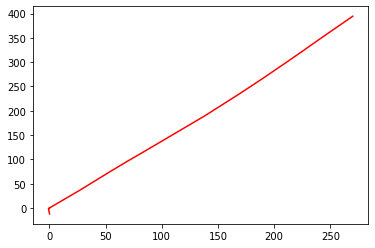

In [28]:
xs = trajectory_test[:,0, 3]
ys = trajectory_test[:,1, 3]
zs = trajectory_test[:,2, 3]
plt.plot(xs, ys, zs, c='red', label="Estimate")

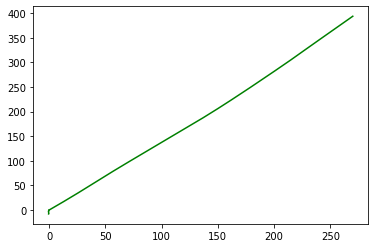

In [29]:
xs = handler.gt[:,0, 3]
ys = handler.gt[:,1, 3]
zs = handler.gt[:,2, 3]
plt.plot(xs, ys, zs, c='green', label="Estimate")

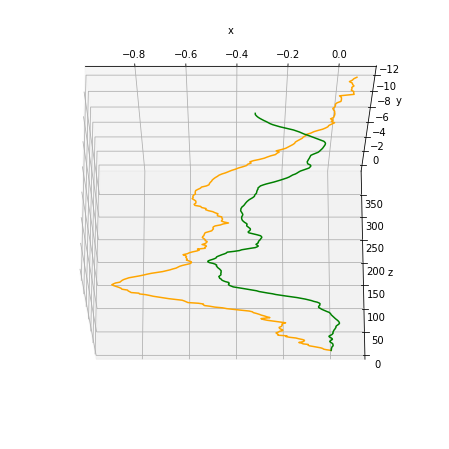

In [30]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(trajectory_test[:, :, 3][:, 0], 
        trajectory_test[:, :, 3][:, 1], 
        trajectory_test[:, :, 3][:, 2], label='estimated', color='orange')

ax.plot(handler.gt[:, :, 3][:, 0], 
        handler.gt[:, :, 3][:, 1], 
        handler.gt[:, :, 3][:, 2], label='ground truth',color ='green')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(elev=-20, azim=270)